# Importing necessary libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_link = 'https://drive.google.com/file/d/1e7A5B4PFGSxjP8wHlwv1jnGTRpzuX55h/view?usp=share_link'
file_name = 'water_potability'
gdown.download(file_link, file_name, fuzzy= True)

Downloading...
From: https://drive.google.com/uc?id=1e7A5B4PFGSxjP8wHlwv1jnGTRpzuX55h
To: /content/water_potability
100%|██████████| 525k/525k [00:00<00:00, 64.5MB/s]


'water_potability'

* Downloading the data from google drive with the help of gdown

# Description of all the columns

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
data = pd.read_csv('/content/water_potability')

* Loading the data file into colab and saving it as data variable 

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


* Checking the first five rows of the dataframe

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

* Now know that we have to work with 10 columns where 9 of them might be features to find our target i.e potability( if a water is suitable to drink or not)

In [ ]:
data.shape

(3276, 10)

* The dataframe contains total of 3276 rows of data spread in 10 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* The data type of all the feature columns are float and target is int.
* There are some missing datas in columns; ph,Sulfate and Trihalomethanes.

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

* Since the target data have only two results i.e either potable or not potable we will use classification method.

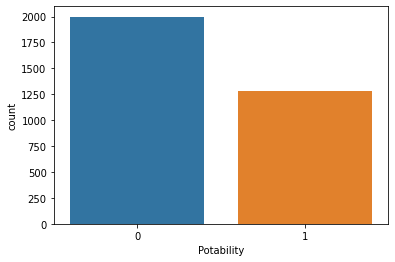

In [ ]:
ax = sns.countplot(x= 'Potability', data= data)

* on given data number of non potable water is almost 1.5 times of potable water i.e more water sources are harmful to drink.

In [ ]:
data.isna().sum() # isna checks if a column contains any null value and sum counts the total times a null value is found in a column

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

* Finding the amount of missing datas in each column

# Visualizing and handeling missing datas

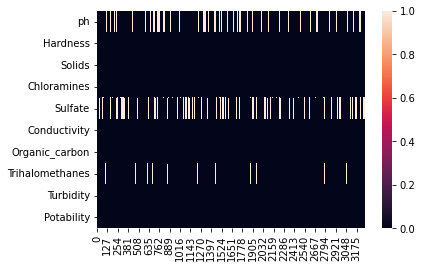

In [ ]:
sns.heatmap( data.isna().transpose()) # transpose changes row to column and vice-versa

* Visualing missing data with heatmap

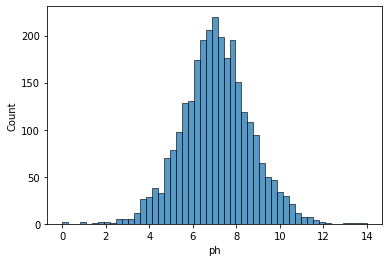

In [ ]:
ph_data = sns.histplot(x = 'ph', data = data) # x means the column of data we want to plot and data means dataframe to use

* visualizing values of ph

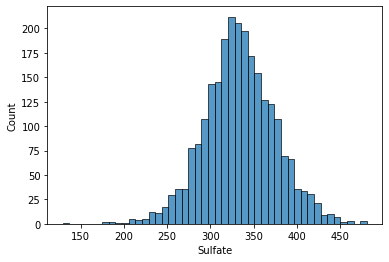

In [ ]:
sulfate_data = sns.histplot(x = 'Sulfate',data = data)

* visualizing values of sulfate

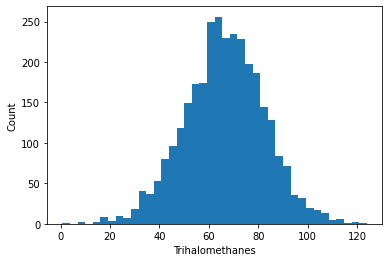

In [ ]:
trihalomethanes_data = plt.hist(x = 'Trihalomethanes', data = data, bins = 40) # bins means how many values to plot in histogram
plt.xlabel('Trihalomethanes') # label for x-axis
plt.ylabel('Count') # label for y-axis
plt.show() 

* visualizing values of trihalomethanes

## Conclusion from visualization of missing data columns
* We can see datas in all 3 missing columns are almost normally distributed.
* we can fill the missing data with the median of all data in respective columns.

In [ ]:
def fill_missing(col):
  return data[col].fillna(value= data[col].median()) #fillna replaces all the null value

* function to replace missing values with median

In [ ]:
data['ph'] = fill_missing('ph')
data['Sulfate'] = fill_missing('Sulfate')
data['Trihalomethanes'] = fill_missing('Trihalomethanes')

* replacing all the null values with medians using function

In [ ]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

* checking if there is missing values or not

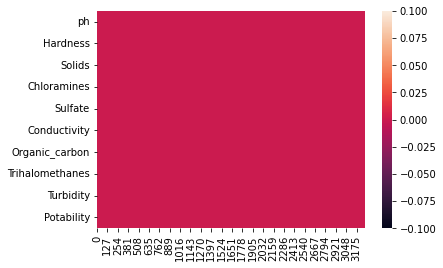

In [ ]:
sns.heatmap(data.isna().transpose()) 

* we can see there are no missing values in the heatmap

# Outliers detection and handeling

In [ ]:
feature_columns = list(data.columns)
feature_columns.remove('Potability')
feature_columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

* listing all the columns in data as data_columns and removing 'Potability' column as it is the target column

### Plotting all the outliers in every features

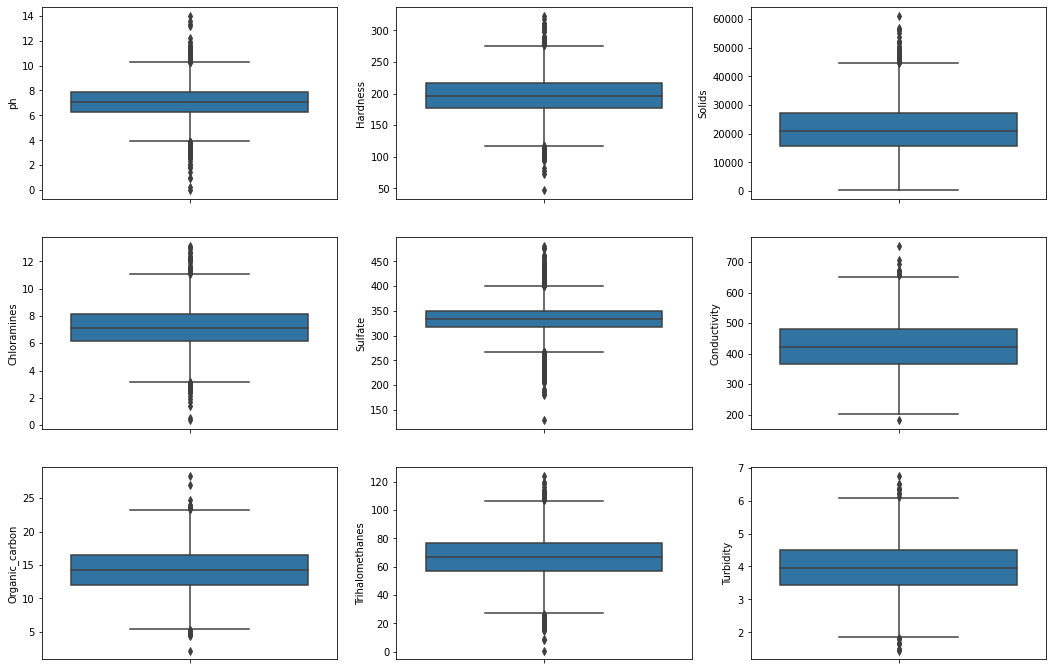

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (18,12)) 
plt1 = sns.boxplot(data = data, y = 'ph', ax = axs[0,0])
plt2 = sns.boxplot(data= data, y = 'Hardness', ax = axs[0,1])
plt3 = sns.boxplot(data = data, y = 'Solids', ax = axs[0,2])
plt4 = sns.boxplot(data = data, y = 'Chloramines', ax = axs[1,0])
plt5 = sns.boxplot(data = data, y = 'Sulfate', ax = axs[1,1])
plt6 = sns.boxplot(data = data, y = 'Conductivity', ax = axs[1,2])
plt7 = sns.boxplot(data = data, y = 'Organic_carbon', ax = axs[2,0])
plt8 = sns.boxplot(data = data, y = 'Trihalomethanes', ax = axs[2,1])
plt9 = sns.boxplot(data = data, y = 'Turbidity', ax = axs[2,2])
plt.show()

* from above figure we can see that there are outliers in every column

## Outlier detection using standard deviation method

In [ ]:
def outlier_detection(data,columns):
  outliers = [] # list which will hold the outliers
  outliers_dict = {}
  outliers_count = 0

  for i in columns:
    mean= data[i].mean() # find mean of a particular column
    std= data[i].std()   # find standard deviation of particular column

    lower_whisker = mean - 3*std # lower bound of data
    upper_whisker = mean + 3*std # upper bound of data

    # data outside of lower or upper whisker are considered as outliers

    print(f''' 
        column : {i}
        lower_whisker : {lower_whisker}
        upper_whisker :{upper_whisker}''')
    
    for x in data[i]:
      if (x < lower_whisker or x > upper_whisker):
        outliers.append(x) # adding outlies as list
        outliers_count += 1 # increasing the outliers count by 1 each time a new outlier is found
    
    print(f'''
        Total outliers : {len(outliers)}
        Outliers : {outliers}
        ''')
    
    outliers_dict.update({i:outliers_count}) # updating outliers dictionary with column as key and total outliers as its value
    outliers.clear() # clearing the outliers list
    outliers_count = 0 # resetting outliers count to 0 so that during next loop count starts from 0
  return outliers_dict



In [ ]:
a = outlier_detection(data,feature_columns) # using outliner detection to detect all outliners in feature columns

 
        column : ph
        lower_whisker : 2.664073340882058
        upper_whisker :11.48431370270357

        Total outliers : 28
        Outliers : [1.844538366498842, 2.612035914817261, 13.175401724233025, 1.757037115490783, 0.2274990502021987, 11.89807802974039, 0.9899122128791388, 12.246928068519756, 2.5692435620279186, 11.53488049111763, 13.999999999999998, 11.568767965914164, 2.5581027992200664, 2.538115773481364, 11.907739829669833, 2.376768075959951, 13.54124023656798, 13.349888560662292, 1.4317815547427415, 11.563169064627823, 0.975577989772022, 11.496702452694173, 0.0, 11.496858885301972, 11.62114013448698, 2.1285314339651724, 1.985383359263048, 11.491010908391427]
        
 
        column : Hardness
        lower_whisker : 97.73021158841905
        upper_whisker :295.008780446184

        Total outliers : 18
        Outliers : [304.23591211231667, 300.29247579584023, 47.432, 81.7108952702466, 77.45958610044372, 307.70602408798766, 94.0913074831264, 323.124, 311.38395647

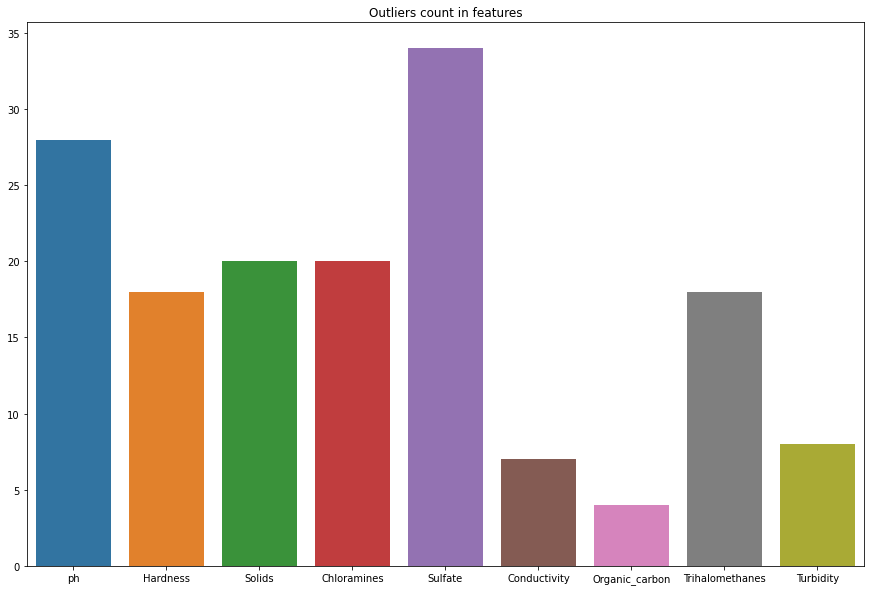

In [ ]:
df = pd.DataFrame() # creating a dataframe
df = df.append(a, ignore_index=True) # appending dataframe with the outliner dictionary
plt.figure( figsize = (15,10)) # defining the size of plot
sns.barplot(data=df) # using seaborn barplot and dataframe as its data
plt.title('Outliers count in features')
plt.show()

* The sulfate column contains most amount of outliers about 34 to be exact whereas organic_carbon contains least amount of outliers with just 4.

In [ ]:
def outlier_handeling(data,columns):
   for i in columns:
    mean= data[i].mean()
    std= data[i].std()

    lower_whisker = mean - 3*std
    upper_whisker = mean + 3*std
    
    for x in range(len(data)):
      if data.loc[x, i] < lower_whisker: 
        data.loc[x, i] = lower_whisker
      if data.loc[x,i] > upper_whisker:
        data.loc[x, i] = upper_whisker

* This function changes outliers to lower whisker or upper whisker according to the value they are close to

In [ ]:
copy_data = data.copy() 
outlier_handeling(copy_data,feature_columns)

* Making copy of data and changing the values of outliers

## Plotting the changed data in histogram and boxplot

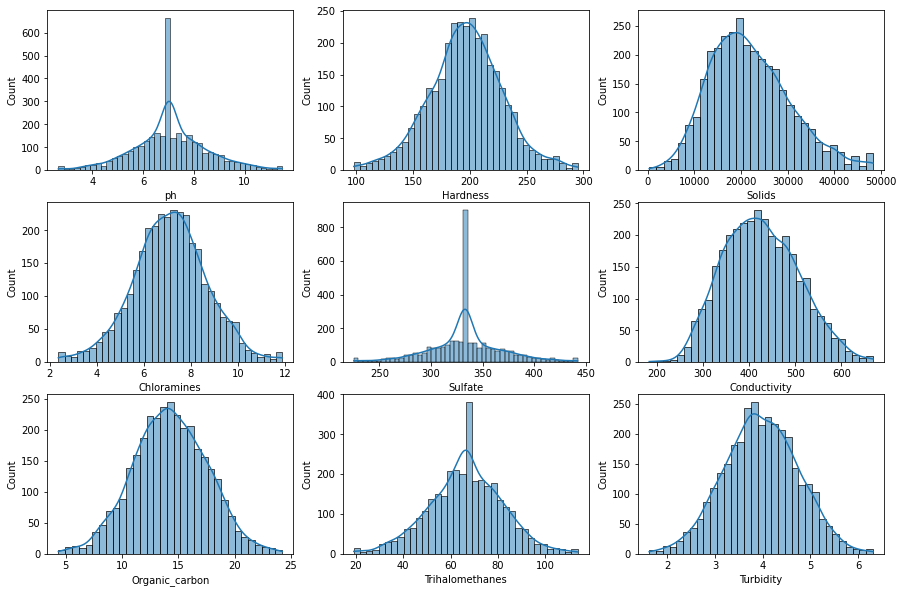

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.histplot(data = copy_data, x = 'ph', ax = axs[0,0], kde = True)
plt1 = sns.histplot(data= copy_data, x = 'Hardness', ax = axs[0,1],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Solids', ax = axs[0,2],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Chloramines', ax = axs[1,0],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Sulfate', ax = axs[1,1],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Conductivity', ax = axs[1,2],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Organic_carbon', ax = axs[2,0],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Trihalomethanes', ax = axs[2,1],kde = True)
plt1 = sns.histplot(data = copy_data, x = 'Turbidity', ax = axs[2,2],kde = True)
plt.show()

* from above histogram we can see all the features are normally distributed with some of the features having high concentration at median which might be caused because we filled all the missing value with median.

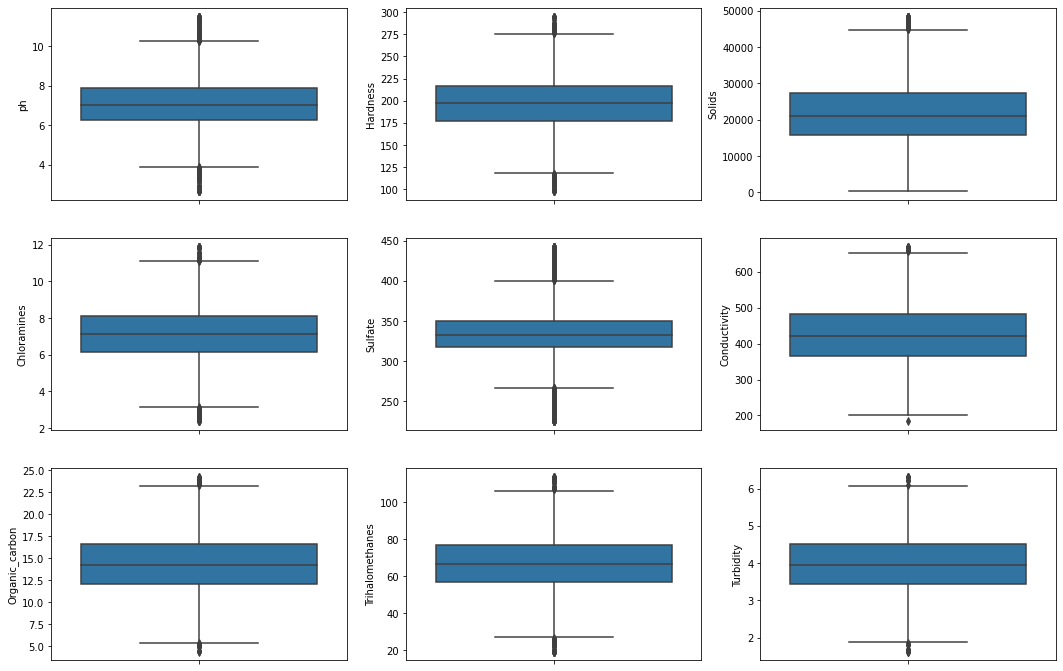

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (18,12)) 
plt1 = sns.boxplot(data = copy_data, y = 'ph', ax = axs[0,0])
plt2 = sns.boxplot(data= copy_data, y = 'Hardness', ax = axs[0,1])
plt3 = sns.boxplot(data = copy_data, y = 'Solids', ax = axs[0,2])
plt4 = sns.boxplot(data = copy_data, y = 'Chloramines', ax = axs[1,0])
plt5 = sns.boxplot(data = copy_data, y = 'Sulfate', ax = axs[1,1])
plt6 = sns.boxplot(data = copy_data, y = 'Conductivity', ax = axs[1,2])
plt7 = sns.boxplot(data = copy_data, y = 'Organic_carbon', ax = axs[2,0])
plt8 = sns.boxplot(data = copy_data, y = 'Trihalomethanes', ax = axs[2,1])
plt9 = sns.boxplot(data = copy_data, y = 'Turbidity', ax = axs[2,2])
plt.show()

* we can see that all the outliers are now closer to lower or outer bounds

In [ ]:
sns.pairplot(data =copy_data, hue ='Potability')

Output hidden; open in https://colab.research.google.com to view.

* from the above pairplot we see the relation of features with each other and how potable values are affected by each feature.


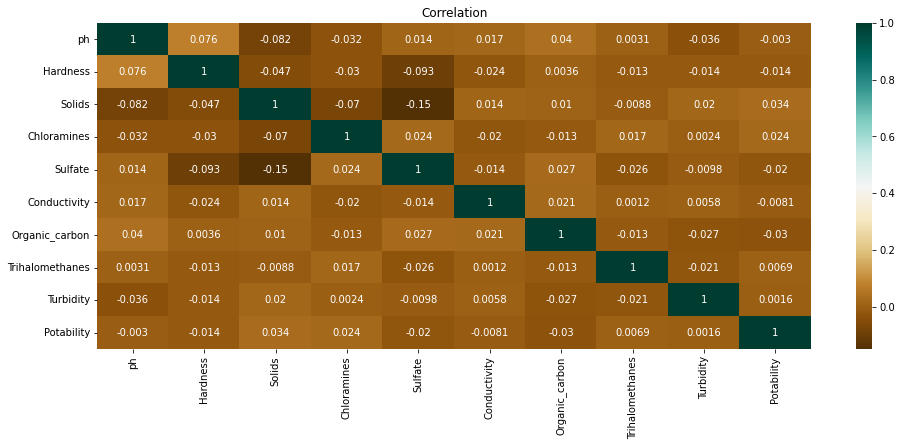

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot= True, cmap='BrBG')
plt.title('Correlation')
plt.show()

* solids, chloramines, trihalomethanes and turbidity have positive correlation while ph, hardness, sulfate, conductivity and organic carbon have negative correlation with potability.

# Training the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = copy_data.iloc[:,:9] #defining value of x 
y = copy_data.Potability #defining value of y

In [ ]:
X.head() # shows the first 5 values of x dataframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
y.head() # shows the first 5 values of y dataframe

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state = 40) 


* splitting data into training data and testing data controlled by test_size .
* test_size = 0.2 means 20% data is splitted for testing while the remaining 80% is used for training.


In [ ]:
x_train.shape , y_train.shape 

((2620, 9), (2620,))

In [ ]:
x_test.shape , y_test.shape

((656, 9), (656,))

* checking the shape of train and test dataframe

## Using Naive Bayes method of classification algorithm

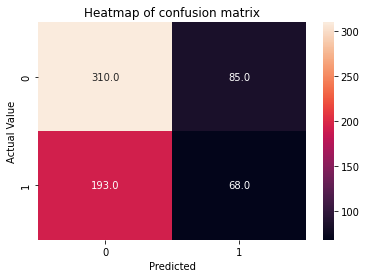

***********************************************
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       395
           1       0.44      0.26      0.33       261

    accuracy                           0.58       656
   macro avg       0.53      0.52      0.51       656
weighted avg       0.55      0.58      0.55       656



In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB() # creating the model
model.fit(x_train,y_train)  # fitting the training datas
y_pred = model.predict(x_test) # prediting the test datas 
cm = confusion_matrix(y_test,y_pred) # creating confusion matrix of test vs actual value
sns.heatmap(cm, annot = True, fmt='.1f') # plotting confusion matrix in heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.title('Heatmap of confusion matrix')
plt.show()
print('***********************************************')
print(classification_report(y_test,y_pred)) # printing classication report of model

* The accuracy of the model is just 58%.
* The model predicted 193 test values as not potable which were actually potable.(Also called False Negative value)
* The model predicted 85 test values as potable which in reality were not potable.(Also called False Positive value)
* Both precision and recall were higher for non-potable values.
* F1 score for non potable values is quiet satisfactory whereas f1 score of potable values is very low.

## Using Decision Tree method of classification algorithm

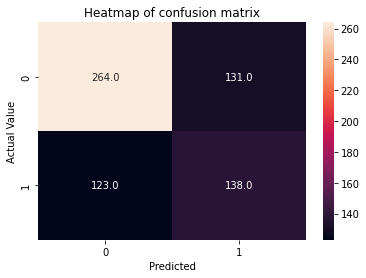

***********************************************
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       395
           1       0.51      0.53      0.52       261

    accuracy                           0.61       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.61      0.61       656



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.title('Heatmap of confusion matrix')
plt.show()
print('***********************************************')
print(classification_report(y_test,y_pred))

* The accuracy of the model is 61 % which is slight improvement from previous model.
* The amount of true positive(136) and false positive(129) were increased wherease false negative(125) and true negative(266) values decreased.
* Precision, recall and f1-score of potable values increased slightly.


## Using Random Forest method of classification algorithm

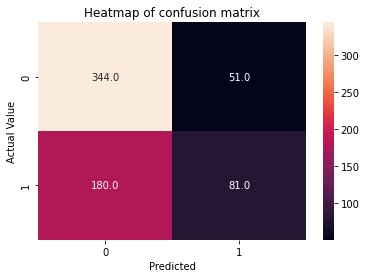

***********************************************
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       395
           1       0.61      0.31      0.41       261

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.61       656



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.title('Heatmap of confusion matrix')
plt.show()
print('***********************************************')
print(classification_report(y_test,y_pred))


* The values of confusion matrix are almost similar to that of naive bayes classification.
* The accuracy is 65% which is better than any previous algorithms.
* The specificity is very high in this model so, among the 3 this is best model.